In [ ]:
# [Nur Colab] Diese Zellen müssen nur auf *Google Colab* ausgeführt werden und installieren Packete und Daten
!wget -q https://raw.githubusercontent.com/KI-Campus/AMALEA/master/requirements.txt && pip install --quiet -r requirements.txt
!wget --quiet "https://github.com/KI-Campus/AMALEA/releases/download/data/data.zip" && unzip -q data.zip

# Wie geht's eigentlich weiter?

## Einführung und Überblick

In dieser Aufgabe lernen Sie die Grundlagen zur Entwicklung rekurrenter neuronaler Netze (RNN), speziell Long Short-Term Memory Networks (LSTM). Diese Art von Algorithmen sind wegen ihrer Fähigkeit, zeitliche Abhängigkeiten in Daten zu beschreiben, sehr bekannt. Wenn Sie versuchen, ein Signal oder die Reaktion eines kausalen Systems zu modellieren, sind RNNs normalerweise eine der ersten Optionen, die Sie in Betracht ziehen (zusammen mit typischen statistischen Methoden wie linearen Regressionen, exponentieller Glättung, ARIMA-Modellen usw., die in dieser Aufgabe nicht berücksichtigt werden). Durch die rekursiven Verbindungen in diesem neuronalen Netz entsteht eine Art Gedächtnis, das Zeitreihen gut beschreibt. Dies ist besonders hilfreich im Hinblick auf Prognosen. Prognosen werden von vielen Unternehmen verwendet, um bei der Budgetierung, der Planung und der Abschätzung des zukünftigen Wachstums zu helfen. Mit anderen Worten, es ist der Versuch, zukünftige Ergebnisse auf der Grundlage vergangener Ereignisse vorherzusagen.

Diese Arbeit ist wie folgt aufgebaut: Zunächst werden einige theoretische Hintergründe zur Zeitreihenanalyse und -prognose gegeben. Dann wird auf die Datenvorbereitung für Zeitreihen eingegangen, was der erste Schritt ist, den man vor Beginn eines jeden Prognoseprojekts machen muss. Danach wird der interessanteste Teil erklärt: LSTMs. Wir werden zunächst ein einfaches Vanilla-LSTM betrachten, mit einem Hidden Layer. Danach werden wir mehrere Layers stapeln und die Ergebnisse mit der Vanilla-Lösung vergleichen. Am Ende werden Sie einen TV-Skript-Generator erforschen und dabei Ihr erworbenes Wissen über Zeitreihen und LSTM-Netzwerke anwenden.

## Zeitreihenvorhersage
Eine Zeitreihe ist eine Folge von Beobachtungen, die zeitlich aufeinander folgen. Diese Beobachtungen sind normalerweise Messungen in Form von numerischen Werten. Zum Beispiel kann der alle fünf Minuten gemessene Batteriestand eines Elektroautos als Zeitreihe ausgedrückt werden.

### Beschreiben vs. Vorhersagen
Das Verstehen eines Datensatzes, in diesem Fall Zeitreihenanalyse genannt, ist ein wichtiger Schritt, bevor man mit der Arbeit des Datensatzes beginnt. Dies kann helfen, bessere Vorhersagen zu treffen. Eine tiefe Zeitreihenanalyse ist jedoch nicht erforderlich, da sie zu einem großen technischen Aufwand, Zeit und Fachwissen führen kann, die nicht direkt mit dem gewünschten Ergebnis, nämlich der Vorhersage der Zukunft, übereinstimmt.

Bei der deskriptiven Modellierung oder __Zeitreihenanalyse (engl. time series analysis)__ wird eine Zeitreihe modelliert, um ihre Komponenten in Bezug auf saisonale Muster, Trends, Beziehung zu externen Faktoren und dergleichen zu bestimmen. Im Gegensatz dazu nutzt die __Zeitreihenprognose (engl. time series forecasting)__ die Informationen in einer Zeitreihe (oft zusammen mit zusätzlichen Informationen), um zukünftige Werte der Reihe zu prognostizieren.[4]

### Problem Definition
Im folgenden Tutorial werden Sie mit einem einfachen Datensatz der elektrischen Last in Deutschland in MWh von Oktober 2017 bis Oktober 2019 arbeiten. Das Ziel dieser Aufgabe ist es, die Last für eine Woche mit LSTMs zu prognostizieren.

Erkunden Sie zunächst den gegebenen Datensatz. Laden Sie die csv-Datei *Load_DE_2017_2019.csv*, geben Sie einige Datenelemente aus, prüfen Sie die Größe der Datei, verwenden Sie die Funktion __[describe()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)__ von Pandas, um Mittelwert, Standardabweichung, Median, Minimum und Maximum der Beobachtungen zu prüfen. Dies kann helfen, eine Vorstellung von der Verteilung und Streuung der Werte zu bekommen. Dies kann Ihnen auch einige Ideen zur Datenskalierung und sogar zur Datenbereinigung geben, die Sie später als Teil der Vorbereitung Ihres Datensatzes für die Modellierung durchführen können.

In dieser Aufgabe werden wir Series von Pandas als Datenstruktur verwenden. Weitere Informationen finden Sie in der offiziellen Pandas-Dokumentation [Intro to Data Structures](http://pandas.pydata.org/pandas-docs/stable/getting_started/dsintro.html).

<div class="alert alert-block alert-success">
<b>Aufgabe 6.3.1:</b> Vervollständigen Sie die folgenden Code-Zellen entsprechend den darin enthaltenen Kommentaren.

</div>

In [ ]:
from pandas import read_csv
import pandas as pd

# Load the dataset using read_csv() with
# squeeze=True to return a Series instead of a DataFrame
# parse_dates=True, dayfirst=True to convert the date to a datetime column
# index_col=0 to consider the date as index
# STUDENT CODE HERE

# STUDENT CODE until HERE

# Use the function to_numeric with treating errors as 'coerce' from pandas in order to read the values of the dataset as floats
# And fill the NANs in the dataset using the method "ffil" with downcast as "infer"
# STUDENT CODE HERE

# STUDENT CODE until HERE

In [ ]:
# Check that a Series data type (and not a DataFrame) was created
print(type(series))

In [ ]:
# Print some rows of the dataset (Hint: use .head() for this)
# STUDENT CODE HERE

# STUDENT CODE until HERE

In [ ]:
# Check the size of the series (Hint: use .size for this)
# STUDENT CODE HERE

# STUDENT CODE until HERE

In [ ]:
# Check something else from the series if you are curious...
# For example print the data from October
# STUDENT CODE HERE

# STUDENT CODE until HERE

In [ ]:
# Calculate descriptive statistics on your time series using describe()
# STUDENT CODE HERE

# STUDENT CODE until HERE

### Taxonomie von Zeitreihenprognosen-Problemen

Um das Verständnis des Prognoseproblems zu verbessern, ist die Struktur des Modells erforderlich und es ist notwendig zu wissen, wie man es auswertet. Daher wird empfohlen, die folgenden Schlüsselpunkte zu berücksichtigen, bevor ein Projekt zur Zeitreihenprognose gestartet wird [2]:

- __Eingabedaten vs. Ausgabedaten__: Die Eingabedaten sind die Werte, die zur Erstellung einer Prognose verwendet werden. Zum Beispiel die Verkaufsdaten der letzten sieben Tage, um den Umsatz des nächsten Tages zu prognostizieren. Die Eingabedaten sind nicht die Daten, die zum Trainieren des Modells, sondern zum Testen/Vorhersagen verwendet werden.<br>
    Die Ausgabedaten entsprechen der Vorhersage oder Prognose für einen zukünftigen Zeitschritt, der über die als Eingabe bereitgestellten Daten hinausgeht.<br>
    Die Definition der Ein- und Ausgabedaten des Modells zwingt Sie dazu, sich Gedanken darüber zu machen, was genau benötigt wird oder werden könnte, um eine Prognose zu erstellen. Möglicherweise können Sie bei den Eingabedaten nicht genau sein. Sie können z. B. nicht wissen, ob ein oder mehrere vorherige Zeitschritte erforderlich sind, um eine Prognose zu erstellen. Aber Sie werden in der Lage sein, die Variablen zu identifizieren, die einen Einfluss auf den Prognoseprozess haben könnten.

- __Endogene vs. Exogene Eingangsvariablen__: Eine Eingangsvariable ist endogen, wenn sie von anderen Variablen im System beeinflusst wird und die Ausgangsvariable von ihr abhängt. In einer Zeitreihe zeigen die Beobachtungen einer Eingangsvariablen Abhängigkeiten in sich selbst. Zum Beispiel ist die Beobachtung zum Zeitpunkt *t* abhängig von der Beobachtung zum Zeitpunkt _t-1_; _t-1_ kann von _t-2_ abhängen, und so weiter. <br>
    Eine Eingangsvariable ist eine exogene Variable, wenn sie unabhängig von anderen Variablen im System ist und die Ausgangsvariable von ihr abhängt. Vereinfacht ausgedrückt, werden endogene Variablen von anderen Variablen im System (einschließlich ihrer selbst) beeinflusst, während exogene Variablen dies nicht sind und als außerhalb des Systems betrachtet werden.<br>
    Typischerweise hat ein Zeitreihenprognoseproblem endogene Variablen (z. B. ist die Ausgabe eine Funktion einer gewissen Anzahl von vorherigen Zeitschritten) und kann exogene Variablen haben oder auch nicht. Oft werden die exogenen Variablen ignoriert. Das explizite Nachdenken über beide Variablentypen kann helfen, leicht zu übersehende exogene Daten oder sogar technische Features zu identifizieren, die das Modell verbessern können.
    
- __Unstrukturiert vs. Strukturiert__: Es ist nützlich, jede Variable in einer Zeitreihe darzustellen und die Darstellung auf mögliche Muster zu untersuchen. Eine Zeitreihe für eine einzelne Variable weist möglicherweise kein offensichtliches Muster auf. Wir können eine Reihe ohne Muster als unstrukturiert betrachten, da es keine erkennbare zeitabhängige Struktur gibt. <br>
    Alternativ dazu kann eine Zeitreihe offensichtliche Muster aufweisen und in vier Bestandteile zerlegt werden:
    - Level: Der Basiswert der Reihe, wenn sie eine Gerade wäre.
    - Trend: Das optionale und oft linear ansteigende oder abfallende Verhalten der Reihe über die Zeit.
    - Saisonalität: Die optionalen sich wiederholenden Muster oder Zyklen des Verhaltens im Zeitverlauf.
    - Rauschen: Die optionale Variabilität in Beobachtungen, die nicht durch das Modell erklärt werden kann.<br>
    
- __Regression vs. Klassifikation__: Bei Regressionsvorhersagemodellen handelt es sich um Probleme, bei denen eine Quantität vorhergesagt wird. Eine Quantität ist ein numerischer Wert, z. B. ein Preis, eine Anzahl, ein Volumen usw. Ein Zeitreihen-Prognoseproblem, bei dem Sie einen oder mehrere zukünftige numerische Werte vorhersagen möchten, ist ein Regressions-Prognosemodellierungsproblem. <br>
    Klassifikationsprädiktive Modellierungsprobleme sind solche, bei denen eine Kategorie vorhergesagt wird. Eine Kategorie ist eine Bezeichnung aus einer kleinen, wohldefinierten Menge von Bezeichnungen. Zum Beispiel sind "heiß", "kalt", "aufwärts", "abwärts", "kaufen" und "verkaufen" Kategorien. Ein Zeitreihenprognoseproblem, bei dem Sie die eingegebenen Zeitreihendaten klassifizieren möchten, ist ein Prognosemodellierungsproblem vom Typ Klassifikation. <br>
    Zwischen diesen Typen gibt es eine gewisse Flexibilität. So kann z. B. ein Regressionsproblem in ein Klassifizierungsproblem und ein Klassifizierungsproblem in eine Regression umgewandelt werden. Einige Probleme, wie z. B. die Vorhersage eines Ordinalwerts, können sowohl eine Klassifizierung als auch eine Regression zugeordnet werden. Es ist möglich, dass eine Neuausrichtung Ihres Zeitreihen-Prognoseproblems dieses vereinfachen kann.

- __Univariat vs. Multivariat__:  Eine einzelne Variable, die über die Zeit gemessen wird, wird als univariate Zeitreihe bezeichnet. Mehrere Variablen, die über die Zeit gemessen werden, werden als multivariate Zeitreihen bezeichnet. Die Betrachtung dieser Frage in Bezug auf Inputs und Outputs kann zu einer weiteren Unterscheidung führen. Die Anzahl der Variablen kann sich zwischen den Inputs und Outputs unterscheiden, d. h. die Daten sind möglicherweise nicht symmetrisch. Es kann z. B. sein, dass Sie mehrere Variablen als Input für das Modell haben und nur an der Vorhersage einer der Variablen als Output interessiert sind. In diesem Fall besteht im Modell die Annahme, dass die mehreren Eingabevariablen das Modell selbst verbessern und für die Vorhersage der einzelnen Ausgabevariablen erforderlich sind.

- __Einschrittig vs. Mehrschrittig__: Ein Prognoseproblem, das eine Vorhersage des nächsten Zeitschritts erfordert, wird als einschrittiges Prognosemodell bezeichnet. Ein Prognoseproblem, das eine Vorhersage von mehr als einem Zeitschritt erfordert, wird hingegen als mehrschrittiges Prognosemodell bezeichnet. Je mehr Zeitschritte in die Zukunft projiziert werden müssen, desto schwieriger wird das Problem, da sich die Unbestimmtheit in jedem prognostizierten Zeitschritt erhöht.

- __Statisch vs. Dynamisch__: Es ist möglich, ein Modell einmal zu entwickeln und es wiederholt für Vorhersagen zu verwenden. Da das Modell zwischen den Prognosen nicht aktualisiert oder geändert wird, kann man dieses Modell als statisch betrachten. Umgekehrt können wir neue Beobachtungen erhalten, bevor wir eine nachfolgende Vorhersage machen, die zur Erstellung eines neuen Modells oder zur Aktualisierung des vorhandenen Modells verwendet werden können. Wir können die Entwicklung eines neuen oder aktualisierten Modells vor jeder Prognose als ein dynamisches Problem betrachten.

- __Kontinuierlich vs. Diskontinuierlich__: Eine Zeitreihe, bei der die Beobachtungen über die Zeit gleichmäßig sind, kann als kontinuierlich beschrieben werden. Viele Zeitreihenprobleme haben kontinuierlich Beobachtungen, z. B. eine Beobachtung pro Stunde, Tag, Monat oder Jahr. Eine Zeitreihe, bei der die Beobachtungen im Laufe der Zeit nicht einheitlich sind, kann als diskontinuierlich bezeichnet werden. Die fehlende Gleichmäßigkeit der Beobachtungen kann durch fehlende oder fehlerhafte Werte verursacht werden. Sie kann auch dadurch bedingt sein, dass Beobachtungen nur sporadisch oder in immer kürzeren Zeitabständen zur Verfügung gestellt werden. Im Falle von uneinheitlichen Beobachtungen kann bei der Anpassung einiger Modelle eine spezielle Datenformatierung erforderlich sein, um die Beobachtungen über die Zeit zu vereinheitlichen.

<div class="alert alert-block alert-success">
<b>Aufgabe/Frage 6.3.2:</b> Jetzt sind Sie an der Reihe. Bewerten Sie die Taxonomie des vorgeschlagenen Vorhersageproblems der elektrischen Last in Deutschland. Beschreiben Sie kurz dieses Problems anhand der oben genannten Stichpunkte.
</div>


<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>


## Datenaufbereitung

### Zerlegen von Zeitreihendaten
Man geht davon aus, dass eine gegebene Zeitreihe aus drei systematischen Komponenten besteht, einschließlich __Level__, __Trend__, __Saisonalität__, und einer nicht systematischen Komponente, die __Rauschen__ genannt wird. Man geht davon aus, dass eine Reihe ein Aggregat oder eine Kombination aus diesen vier Komponenten besteht. Alle Reihen haben ein Level und ein Rauschen. Die Komponenten Trend und Saisonalität sind optional. In diesem Abschnitt werden Methoden zur automatischen Zerlegung einer Zeitreihe erläutert.

Die Bibliothek [Statsmodels](https://www.statsmodels.org/stable/index.html) bietet eine Implementierung der naiven oder klassischen Zerlegungsmethode in einer Funktion namens `seasonal_decompose()`. Sie erfordert die Angabe, ob das Modell additiv oder multiplikativ ist.

__Wichtig:__ Diese Funktion erzeugt eine naive Dekomposition. Für weitergehende Analysen sollten anspruchsvollere Methoden bevorzugt werden.<br>
Das additive Modell wird beschrieben als Y[t] = T[t] + S[t] + e[t]<br>
Das multiplikative Modell ist Y[t] = T[t] * S[t] * e[t]<br>
Die saisonale Komponente wird zunächst durch Anwendung eines Faltungsfilters auf die Daten entfernt. Der Durchschnitt dieser geglätteten Reihe für jede Periode ist die zurückgegebene saisonale Komponente.<br>

Wenn die Art des Zerlegungsmodells unbekannt ist, kann eine Überprüfung eines Plots der Zeitreihe und einiger zusammenfassender Statistiken oft ein guter Anfang sein. Diese geben eine Vorstellung davon, ob das Zeitreihenproblem additiv oder multiplikativ aussieht.

Abbildung 1 zeigt zwei verschiedene Zeitreihen, die mit der additiven (links) und multiplikativen (rechts) Methode zerlegt werden können. Betrachten Sie die Form der Reihen und wie unterschiedlich sie sind.

<img src="images/Additive-Multiplicative-Decomposition-time-series.png" alt="drawing" style="width:700px;"/>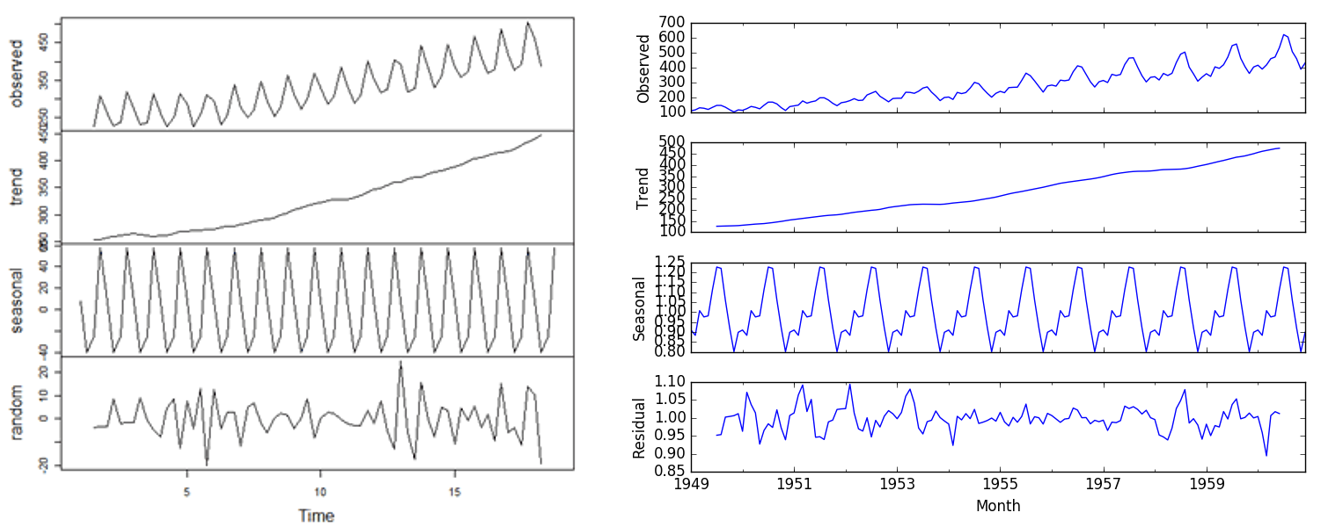
<p style="text-align: center;">
    Abb. 1 - Beispiel für eine additive (links, [10]) und eine multiplikative Zerlegung von Zeitreihen (rechts, [1]).
</p>


Im folgenden Schnipsel sehen Sie den Code für eine additive saisonale Zerlegung.

<div class="alert alert-block alert-success">
<b>Aufgabe 6.3.3:</b> Vervollständigen Sie den Code, um alle Komponenten in einem Graph darzustellen. Schreiben Sie auch einen Code, um eine einzelne Komponente in einem Diagramm darzustellen, z. B. den Trend.
<ul>
<li>Hinweis: <code>sm.tsa.seasonal_decompose</code> liefert ein DecomposeResult. Dieses hat die Attribute <i>observed, trend, seasonal</i> und <i>resid</i>, die Pandas-Reihen sind. Sie können jede von ihnen mit der Pandas-Plot-Funktionalität darstellen.


</ul>

</div>

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

result_add = seasonal_decompose(series[:2000], model='additive', period=96)
trend_add = result_add.trend
seasonality_add = result_add.seasonal
residual_add = result_add.resid
original_data = result_add.observed

In [ ]:
# Plot all components of the time series
# STUDENT CODE HERE

# STUDENT CODE until HERE

In [ ]:
# Plot a single component. For example the seasonality
# STUDENT CODE HERE

# STUDENT CODE until HERE

<div class="alert alert-block alert-success">
<b>Aufgabe/Frage 6.3.4:</b> Zerlegen Sie das gleiche Signal mit dem multiplikativen Modell und vergleichen Sie. Was können Sie aus beiden Zerlegungsmodellen schließen?
</div>

<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>


In [ ]:
# Multiplicative Decomposition
# Plot all components of the time series
# STUDENT CODE HERE

# STUDENT CODE until HERE

In [ ]:
# Plot a single component
# STUDENT CODE HERE

# STUDENT CODE until HERE

### Datennormalisierung
Die Normalisierung ist eine Neuskalierung der Daten aus ihrem ursprünglichen Bereich, so dass alle Werte im Bereich von 0 und 1 liegen. Dies hilft dem neuronalen Netz, die Trends der Daten leichter zu lernen.

Die Bibliothek _Scikit-learn_ verfügt über ein Tool namens *MinMaxScaler*, das zum Skalieren der Daten verwendet werden kann. Die nächsten Schritte sind die __allgemeinen Schritte__, die zu befolgen sind:
- Passen Sie den Skalierer anhand der verfügbaren Trainingsdaten an. Für die Normalisierung bedeutet dies, dass die Trainingsdaten verwendet werden, um die minimalen und maximalen beobachtbaren Werte zu schätzen. Dies geschieht durch den Aufruf der Methode `fit()`.
- Wenden Sie die Skalierung auf die Trainingsdaten an, um die normalisierten Daten zum Trainieren Ihres Modells zu verwenden. Dies geschieht durch den Aufruf der Methode `transform()`.
- Wenden Sie die Skalierung auf die Daten an, die für den Vorwärtsdurchlauf verwendet werden. Dies bereitet die Daten vor, die Sie für die Vorhersagen verwenden werden.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Prepare data for normalization
values = series.values
values = values.reshape((len(values), 1))

# Train the normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(values)
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))

# Normalize the dataset and print
normalized = scaler.transform(values)
print("Normalized values:\n %s" %(normalized))

# Inverse transform and print
inversed = scaler.inverse_transform(normalized)
print("Denormalized values:\n %s" %(inversed))

### Datenstandardisierung
Bei der Standardisierung eines Datensatzes wird die Verteilung der Werte so skaliert, dass der Mittelwert der beobachteten Werte gleich 0 und die Standardabweichung gleich 1 ist. Dies kann als Subtraktion des Mittelwerts oder als Zentrierung der Daten betrachtet werden. Wie die Normalisierung kann auch die Standardisierung nützlich und in einigen Algorithmen für maschinelles Lernen sogar erforderlich sein, wenn Ihre Daten Eingabewerte mit unterschiedlichen Skalen aufweisen. Bei der Standardisierung wird davon ausgegangen, dass Ihre Beobachtungen einer Gauß-Verteilung (Glockenkurve) mit einem gut verhaltenen Mittelwert und einer Standardabweichung entsprechen. Sie können Ihre Zeitreihendaten auch dann standardisieren, wenn diese Erwartung nicht erfüllt ist, aber Sie erhalten möglicherweise keine zuverlässigen Ergebnisse.<br>
Sie können Ihren Datensatz mithilfe des *scikit-learn*-Objekts *StandardScaler* standardisieren.

In [ ]:
from sklearn.preprocessing import StandardScaler
from math import sqrt

# Train the standardization
scaler = StandardScaler()
scaler = scaler.fit(values)
print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, sqrt(scaler.var_)))

# Normalize the dataset and print
standardized = scaler.transform(values)
print("Standardized values:\n %s" %(standardized))

# Inverse transform and print
inversed = scaler.inverse_transform(standardized)
print("De-standardized values:\n %s" %(inversed))

### Zusätzliche Ressourcen zur Datenaufbereitung und Zeitreihenprognose

Die folgenden Artikel helfen Ihnen weiter, falls Sie tiefer in die Zeitreihenprognose einsteigen möchten:

- [Open Machine Learning Course - Time series analysis in Python](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic09_time_series/topic9_part1_time_series_python.ipynb) von Dmitriy Sergeyev
- [7 Ways Time Series Forecasting Differs from Machine Learning](https://www.datascience.com/blog/time-series-forecasting-machine-learning-differences) verfasst von Roman de las Heras
- [Data Science for Business - Time Series Forecasting Part 1: EDA & Data Preparation](https://shiring.github.io/forecasting/2017/05/28/retail_forcasting_part1)

## Limitationen von mehrschichtigen Perzeptronen (engl. Multilayer Perceptrons)
Trotz ihrer Flexibilität und Leistungsfähigkeit funktionieren Feed-Forward-Neuronale Netze nur für Probleme gut, deren Eingaben und Targets sinnvoll mit Vektoren fester Dimensionalität kodiert werden können. Dies ist eine erhebliche Einschränkung, da viele wichtige Probleme am besten mit Sequenzen ausgedrückt werden, deren Länge nicht von vornherein bekannt ist. Zum Beispiel sind Spracherkennung und maschinelle Übersetzung sequenzielle Probleme. Ebenso kann das Beantworten von Fragen auch als das Abbilden einer Folge von Wörtern angesehen werden, die die Frage darstellen zu einer Folge von Wörtern, die die Antwort darstellen. [5]

Aus dem Stand der Technik ist auch bekannt, dass MLPs schlecht abschneiden, wenn das zu lösende Problem zeitliche Abhängigkeiten aufweist, wie es bei Zeitreihen-Prognoseproblemen häufig der Fall ist. Dies ist auf den Mangel an Langzeitspeicher im Netzwerk zurückzuführen. Für diese Art von Anwendungen haben sich rekurrente neuronale Netze als leistungsfähiger erwiesen als MLPs. Diese Art von Netzwerken wird in diesem Abschnitt beschrieben.

## Rekurrente Neurale Netzwerke
Rekurrente neuronale Netze (RNNs) enthalten Zyklen, die die Aktivierungen der Neuronen aus einem vorherigen Zeitschritt als Eingaben in das Netz einspeisen. Dies geschieht, um Vorhersagen zum aktuellen Zeitschritt zu beeinflussen. Diese Aktivierungen werden in den internen Zuständen des Netzes gespeichert, die prinzipiell langfristige zeitliche Kontextinformationen enthalten können. Dieser Mechanismus erlaubt es RNNs, ein sich dynamisch veränderndes Kontextfenster über die Eingangssequenzhistorie auszunutzen. [6]

Um zu verstehen, wie RNNs den inneren Zustand der Zellen als rekurrenten Input einspeisen, zeigt Abbildung 2 [11] die möglichen Architekturen, die RNNs in Abhängigkeit von verschiedenen Anwendungen haben können. In dieser Abbildung ist das Netzwerk in der Zeit abgerollt dargestellt, d. h. die horizontale Achse stellt die Zeit und die vertikale Achse die Tiefe des Netzwerks dar. Zu Lehrzwecken gibt es in allen Architekturdarstellungen in Abbildung 2 nur ein Hidden Layer mit einer Zelle. Im Folgenden sind einige Anwendungsbeispiele für jede Architektur aufgeführt:

- 1:1 : Diese Architektur beschreibt, wie Vanilla Feed Forward neuronale Netzwerke arbeiten. Sie haben eine Eingabe, alle Neuronen sind ohne Rekursion mit dem nächsten Neuron verbunden und es wird nur eine Ausgabe erwartet.
- 1:n : Dies ist z. B. der Fall bei Bildbeschriftungen. In diesem Fall kommt ein einzelnes Bild herein und als Ausgabe wird eine Phrase (eine Menge von Wörtern) erwartet. Die rekursiven Verbindungen von Zelle zu Zelle geben dem Netz die Möglichkeit, das nächste Wort in Abhängigkeit von den letzten Ausgaben genauer zu bestimmen, um einen (prinzipiell) sinnvollen Text zu erzeugen.
- n:1 : Eine solche Architektur kann für die Sentiment-Analyse verwendet werden. In diesem Fall wird ein Text in Form von Wörtern oder Zeichen in das Netzwerk eingegeben und das entsprechend ausgedrückte Sentiment als Ausgabe erwartet.
- n:n : Zwei Anwendungsbeispiele für diese Architektur sind zum einen die Sprachübersetzung (Text als Eingabe, Text als Ausgabe) auf Zeichen- oder Wortebene und zum anderen die Videoklassifikation auf Frame-Ebene, bei der eine Frame-Beschriftung in Abhängigkeit von vergangenen Frames erfolgt.

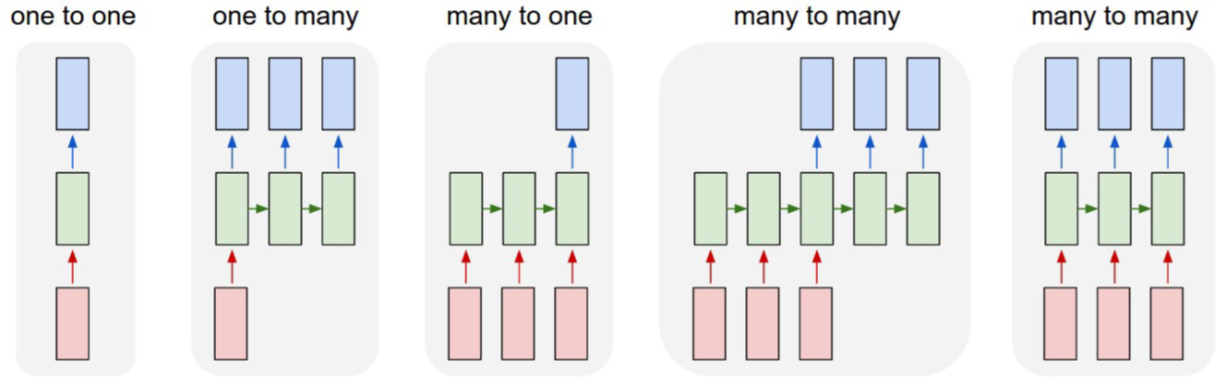
<p style="text-align: center;">
    Abb. 2 - Architekturen neuronaler Netze: Die 1:1-Architektur entspricht einem Vanilla Neural Network, während die Fälle 1:n, n:1 und n:n die Strukturen rekurrenter neuronaler Netze beschreiben [11].
</p>


## Long Short-Term Memory Netzwerke
Long short-term memory Netzwerke (LSTM) sind eine Untergruppe der rekurrenten neuronalen Netze, aber im Gegensatz zu allgemeinen RNNs haben LSTMs eine einzigartige Formulierung, die es ihnen ermöglicht, die Probleme der verschwindenden und ausnutzenden Gradienten (Gewichtsänderungen, die schnell so klein werden, dass sie keine Wirkung mehr haben, oder so groß, dass sie zu einem Überlauf führen) zu vermeiden. [3]  

In den folgenden Teilen dieser Arbeit wird das LSTM zunächst als Vanilla-Version (einzelnes Hidden Layer) behandelt, um die Grundlagen seiner Entwicklung zu verstehen. Danach werden mehrere Schichten übereinander gelegt, um kompliziertere Probleme zu lösen.  

### LSTM Zelle
Eine LSTM-Zelle (auch Speicherzelle genannt) hat Gewichtungsparameter für den Eingang, den Ausgang und für den internen Zustand. Sie werden durch die Exposition gegenüber den Eingaben in jedem Zeitschritt aufgebaut und bei der Berechnung der Ausgabe(n) verwendet.
Der Schlüssel zur Speicherzelle sind die Gates. Auch diese sind gewichtete Funktionen, die den Informationsfluss in der Zelle weiter steuern. <br>
In einer LSTM-Zelle gibt es drei Gates, wie in Abbildung 3 zu sehen ist:
- Forget-Gate: Entscheidet, welche Informationen in der Zelle verworfen werden.
- Input-Gate: Entscheidet, welche Werte von der Eingabe verwendet werden, um den Speicherzustand zu aktualisieren.
- Ausgangs-Gate: Entscheidet, was basierend auf dem Eingang und dem Speicher der Zelle ausgegeben werden soll. [3]<br>

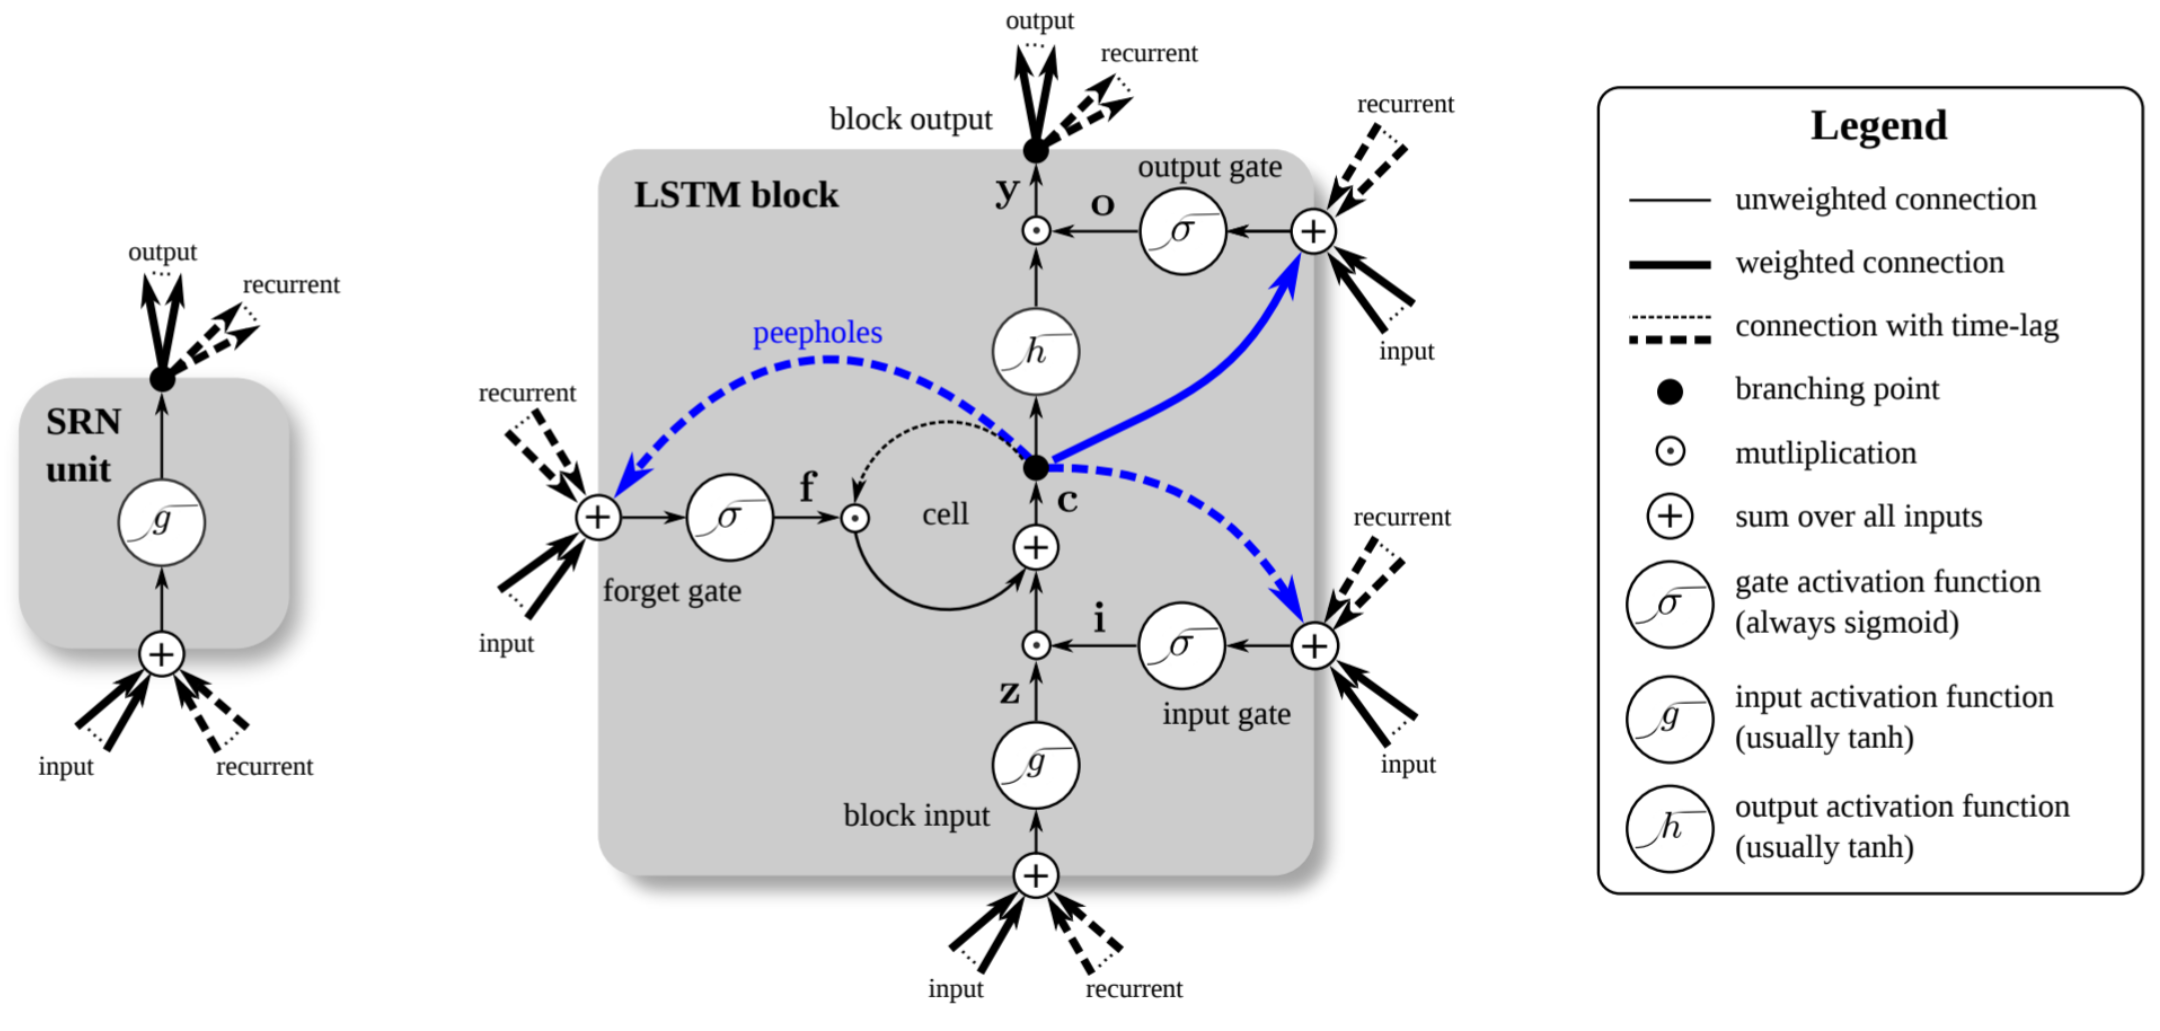
<p style="text-align: center;">
    Abb. 3 - Detailliertes Schema der Einheit eines einfachen rekurrenten Netzwerks (RNN) (links) und einer Speicherzelle (rechts), wie sie in den Hidden Layers eines LSTMs verwendet werden. [7]
</p>


### Limitationen von LSTM
Eine wichtige Einschränkung von LSTMs ist die Möglichkeit, den Speicher zu missbrauchen. Es ist möglich, ein LSTM-Modell dazu zu zwingen, sich eine einzelne Beobachtung über eine sehr lange Anzahl von Eingabezeitschritten zu merken. Dies ist eine schlechte Nutzung von LSTMs. Wenn man von einem LSTM-Modell verlangt, sich mehrere Beobachtungen zu merken, wird es scheitern. Das kann man sehen, wenn man LSTMs auf Zeitreihenvorhersagen anwendet, bei denen das Problem als Autoregression formuliert ist, die erfordert, dass die Ausgabe eine Funktion von mehreren entfernten Zeitschritten in der Eingabesequenz ist. Ein LSTM kann gezwungen werden, dieses Problem zu lösen, wird aber im Allgemeinen weniger effizient sein als ein sorgfältig entworfenes Autoregressionsmodell.

### Vanilla LSTM
Das neuronale Netzwerk LSTM kann für univariate Zeitreihenprognosen verwendet werden. Wie ein RNN liest es jeden Zeitschritt einer Eingabesequenz schrittweise ein. Das LSTM hat einen internen Speicher, der es ihm ermöglicht, interne Zustände zu akkumulieren, während es die Schritte einer gegebenen Eingabesequenz liest. Am Ende der Sequenz gibt jeder Knoten in einer Schicht von versteckten LSTM-Einheiten (engl. hidden units) einen einzelnen Wert aus. Dieser Vektor von Werten fasst zusammen, was das LSTM gelernt oder aus der Eingabesequenz extrahiert hat. Dies kann von einer vollständig verbundenen Schicht (engl. fully connected layer) interpretiert werden, bevor eine endgültige Vorhersage getroffen wird. [3]

Das folgende Modell umfasst ein einzelnes LSTM-Layer, gefolgt von einer vollständig verbundenen Outputlayer (Dense), wie in Abbildung 4 zu sehen. Dies ist die LSTM-Architektur, die im ursprünglichen LSTM Paper von 1997 [8] definiert wurde, und die Architektur, die bei den meisten kleinen Sequenzvorhersageproblemen gute Ergebnisse liefern wird.

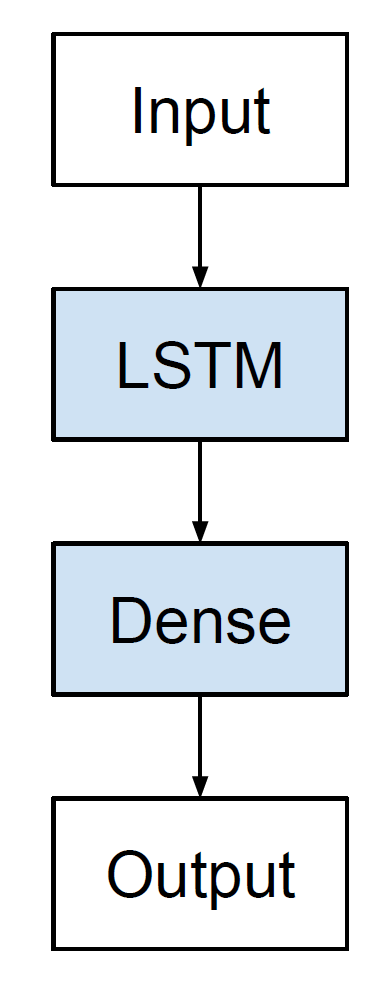
<p style="text-align: center;">
    Abb. 4 - Netzwerkstruktur für ein Vanilla-LSTM-Modell [3]
</p>

Das Vanilla LSTM hat die folgenden 5 attraktiven Eigenschaften [3], von denen die meisten bereits im Originalpaper [8] demonstriert wurden:
- Sequenzklassifikation in Abhängigkeit von mehreren verteilten Eingabezeitschritten.
- Speicherung von präzisen Eingangsbeobachtungen über Tausende von Zeitschritten.
- Sequenzvorhersage als Funktion von vorherigen Zeitschritten.
- Robust gegenüber dem Einfügen von zufälligen Zeitschritten auf der Eingangssequenz.
- Robust gegenüber der Platzierung von Signaldaten auf der Eingangssequenz.

In [ ]:
# Import all libraries needed to implement a Vanilla LSTM
from math import sqrt
import numpy as np
from numpy import array
from numpy import mean
from numpy import std
import pandas as pd
from pandas import DataFrame
from pandas import concat
from pandas import read_csv
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler

# Prepare data
series = read_csv('data/Load_DE_2017_2019.csv', header=0, index_col=0, parse_dates=True, squeeze=True, dayfirst=True)
series = pd.to_numeric(series, errors='coerce').fillna(method='ffill', downcast='infer')
values = series.values
values = values.reshape((len(values), 1))
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(values)
normalized = scaler.transform(values)


Nun werden wir die aus *Load_DE_2017_2019.csv* importierten Zeitreihen in ein geeignetes Format zur Modellierung von LSTM-Netzen konvertieren.

#### Train Test Split

<div class="alert alert-block alert-success">
<b>Aufgabe 6.3.5:</b> Schreiben Sie zunächst eine Funktion, die den univariaten Datensatz in Trainings-/Testsätze aufteilt. Verwenden Sie die Variable <i>n_test</i> (Anzahl der Datenpunkte im Testsatz) als Aufteilungsindex im Array. Der Eingabetyp ist ein Numpy-Array und die Ausgabe sollte ebenfalls ein aufgeteiltes Numpy-Array sein.
</div>

In [ ]:
# Split a univariate dataset into train/test sets
def train_test_split(data:np.array, n_test:int):
    # Input:
        # data: ndarray
        # n_test: integer, splitting index in the array
    # Return:
        # train, test: ndarray

    # STUDENT CODE HERE

    # STUDENT CODE until HERE

In [ ]:
# Test your function
dummy_array = np.arange(1,11,1)
# To keep format the same
dummy_array = np.expand_dims(dummy_array, axis=1)
# Print transposed arrays for better visualization
print('This is the (transposed) dummy_array', dummy_array.T)
print('This is the (transposed) train data:', train_test_split(dummy_array, 2)[0][:].T)
print('This is the (transposed) test data:', train_test_split(dummy_array, 2)[1][:].T)

#### Zeitreihen im überwachten Lernen

<div class="alert alert-block alert-success">
<b>Aufgabe 6.3.6:</b> Schreiben Sie eine Funktion, die eine Liste in das Format des überwachten Lernens umwandelt, d. h. in eine Eingabe- und Prognosesequenz. Betrachten Sie <i>n_in</i> als die Menge der Eingangsdatenelemente und <i>n_out</i> als die Menge der Elemente in der Prognosesequenz. Betrachten Sie die Sequenz als das gleiche Format wie das <i>dummy_array</i>.
</div>

Ein Beispiel ist in der nächsten Abbildung zu sehen:
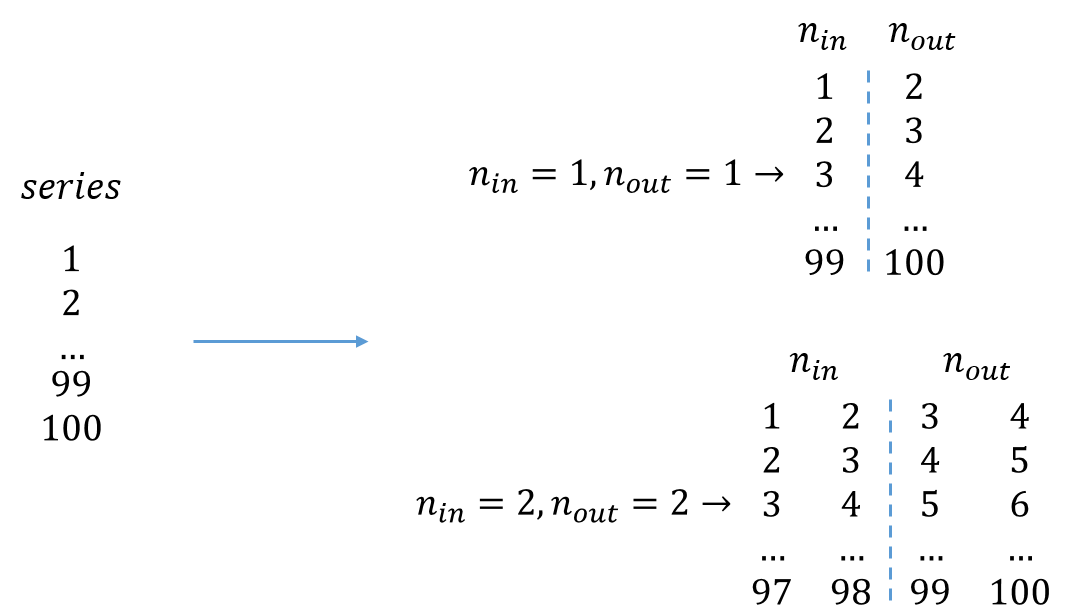

In [ ]:
# Transform list into supervised learning format
def series_to_supervised(data:np.array, n_in:int, n_out:int):
    # Input:
        # data: numpy ndarray
        # n_in: rnn input data elements
        # n_out: elements in the forecast sequence
    # Output:
        # numpy ndarray of size: (data_length - n_in - n_out + 1)x(n_in + n_out)

    # STUDENT CODE HERE

    # STUDENT CODE until HERE

In [ ]:
# Test your function
dummy_array_sup = series_to_supervised(dummy_array, n_in=2, n_out=2)
print(type(dummy_array_sup))
print(dummy_array_sup)

#### Modellanpassung & Vorhersage

Die Funktion zur Berechnung des mittleren quadratischen Fehlers der Vorhersage zu den tatsächlichen Datenwerten ist unten angegeben.

In [ ]:
# Root mean squared error (rmse)
def measure_rmse(actual:list, predicted:list)->float:
    return sqrt(mean_squared_error(actual, predicted))

Mit der Funktion `model_fit()` können Sie die LSTM-Struktur aufbauen und das Modell trainieren. Diese Funktion hat als Eingabe eine *config*-Liste, die fünf Modell-Hyperparameter enthält. Diese sind:

- n_input: Die Anzahl der Lag-Beobachtungen, die als Eingabe für das Modell verwendet werden sollen.
- n_Ausgang: Die Anzahl der Ausgänge des Netzwerks.
- n_Knoten: Die Anzahl der LSTM-Einheiten, die im Hidden Laye verwendet werden sollen.
- n_epochs: Die Anzahl, wie oft das Modell dem gesamten Trainingsdatensatz ausgesetzt werden soll.
- n_batch: Die Anzahl der Samples innerhalb einer Epoche, nach der die Gewichte aktualisiert werden.
- n_freq: Die Frequenz der Reihe, die für die saisonale Zerlegung verwendet wird.

Die Eingabe für das LSTM-Netzwerk muss eine dreidimensionale Struktur haben, die aus (Samples, Timesteps, Features) besteht. *Timesteps* stellt die Anzahl der Elemente aus der Vergangenheit dar, die als Eingabe an das Netzwerk gegeben werden. *Features* sind die Variablen, die als Eingabeelemente verwendet werden, um etwas vorherzusagen, die sogenannten Prädiktoren.

In unserem Fallbeispiel haben wir nur einen Prädiktor als Eingabe, nämlich die elektrische Lastreihe, daher _Features=1_. Die Anzahl der Zeitschritte in der Vergangenheit, die wir in unserem Eingabefenster berücksichtigen, entspricht *n_input*. Die Anzahl der Fenster, die wir für die Vorhersage verwenden, ist gleich _Samples_. Daher muss die Form der Eingangsvariablen für unser LSTM [samples, n_input, 1] sein.

Außerdem sollten Sie den Trainingsdatensatz deseasonalisieren, bevor Sie mit dem Trainingsprozess beginnen. Im Gegensatz zu MLPs und CNNs, die die Sequenzdaten nicht schrittweise einlesen, ist die Leistung des LSTM besser, wenn die Daten stationär sind. Als Übung können Sie jedoch beide Fälle, saisonale und deseasonalisierte Daten als Eingabe, ausprobieren.

<div class="alert alert-block alert-success">
<b>Aufgabe 6.3.7:</b> Vervollständigen Sie die Funktion <code>model_fit()</code> wie in den Kommentaren beschrieben.
</div>

In [ ]:
# Fit a model

def model_fit(train:list, config:list):

    # Input:
        # train: training data (seasonalized)
        # config: list with model hyperparameters
    # Output:
        # model: trained model

    # Unpack config
    n_input, n_output, n_nodes, n_epochs, n_batch, n_freq = config

    # Prepare data: deseasonalize the input data as preparation of the training dataset
    # Please check the train shape afterwards
    # train =  ??

    # STUDENT CODE HERE

    # STUDENT CODE until HERE

    # Change the format of the dataset to be used in supervised learning
    # data =  ??
    # STUDENT CODE HERE

    # STUDENT CODE until HERE

    # Devide the data in features and labels
    train_x, train_y = data[:, :-1], data[:, -1]

    # Reshape training features in the correct input format for LSTM networks
    train_x = train_x.reshape((train_x.shape[0], train_x.shape[1], 1))

    # Init SequentialModel
    model = Sequential()

    # Define one LSTM hidden layer followed by one dense hidden layer and
    # one output layer as a dense layer with one node using model.add() (f.ex. as in Fig. 7 later in this task)
    # STUDENT CODE HERE

    # STUDENT CODE until HERE

    # Compile Model
    model.compile(loss='mse', optimizer='adam')

    # Fit Model
    model.fit(train_x, train_y, epochs=n_epochs, batch_size=n_batch, verbose=1)

    return model

<div class="alert alert-block alert-success">
<b>Aufgabe 6.3.8:</b> Die Funktion <code>model_predict()</code> erzeugt eine Vorhersage auf Basis eines vortrainierten Modells und Daten aus der Vergangenheit (Historie). Vervollständigen Sie den folgenden Code wie in den Kommentaren beschrieben.
</div>

In [ ]:
# Forecast with a pre-fit model

def model_predict(model, history:list, config:list):
    # Input:
        # model: model returned by model_fit()
        # history: all available data from the past
        # config: list with model hyperparameters
    # Output:
        # prediction: corrected prediction of the model with the seasonal term back

    # Unpack config
    n_input, _, _, _, _, n_freq = config

    # Prepare data: Deseasonalize the input data as preparation of the test dataset
    # The correction term has to be used after predicting, in order to give back the seasonality to the data
    # history =  ??
    # correction =  ??
    # STUDENT CODE HERE

    # STUDENT CODE until HERE

    x_input = array(history[-n_input:]).reshape((1, n_input, 1))

    # Forecast
    yhat = model.predict(x_input, verbose=0)

    return correction[-n_freq] + yhat[0]

#### Walk Forward Validierung

Die `walk_forward_validation()` führt die Trainings- und Testprozesse durch, d. h. sie passt das Modell an die Trainingsdaten an, erzeugt dann Vorhersagen aus dem Testdatensatz und berechnet den Vorhersagefehler für eine Posterior-Analyse.

Der hier zu programmierende Ansatz erzeugt Vorhersagen von genau einem Zeitschritt nach dem Ende des Trainingsdatensatzes. Daher wird die Historie-Variable für `model_predict()` mit Trainingsdaten initialisiert und mit dem Testdatensatz verkettet. Sie können einen anderen Ansatz versuchen, bei dem das Modell mit einem Historie-Array getestet wird, das nur Testdaten enthält. Beide werten das Modell auf unterschiedliche Weise aus.

<div class="alert alert-block alert-success">
<b>Aufgabe/Frage 6.3.9:</b> Schreiben Sie bitte eine Analyse der Vor- und Nachteile beider Lösungen und erklären Sie, warum wir bei der Prognose von Zeitreihen den einen oder den anderen Ansatz verwenden sollten.
</div>

<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>




<div class="alert alert-block alert-success">
<b>Aufgabe 6.3.10:</b> Verwenden Sie die Funktionen, die Sie zuvor programmiert haben, um den folgenden Code für <code>walk_forward_validation()</code> zu vervollständigen.
</div>

In [ ]:
# walk-forward validation for univariate data
def walk_forward_validation(data:list, n_test:int, cfg:list):
    # Input:
        # data: time series in ndarray format
        # n_test: integer, splitting index in the array
        # cfg: list of model hyperparameters
    # Output:
        # error: rmse of predictions from the test set
        # predictions: predicted values
        # test_values: data values, ground-truth

    # Initialize the predictions array
    predictions = list()

    # Split dataset
    # train, test = ??
    # STUDENT CODE HERE

    # STUDENT CODE until HERE

    # Fit the model
    # model = ??
    # STUDENT CODE HERE

    # STUDENT CODE until HERE

    # Initialize history array with training dataset as historical data
    history = [x for x in train]

    print('The model starts predicting...')

    # Step over each time-step in the test set
    for i in range(len(test)):

        # Make forecast for history
        # yhat = ??
        # STUDENT CODE HERE

        # STUDENT CODE until HERE

        # Store forecast in list of predictions
        predictions.append(yhat)

        # Add actual observation to history for the next loop
        history.append(test[i])

    # Estimate prediction error
    error = measure_rmse(test, predictions)

    print('Prediction error:  %.3f' % error)
    return error, predictions, test

#### Schlussfolgerung Vanilla LSTM

Der folgende Code führt Ihr LSTM-Vanilla-Modell aus. Es steht Ihnen frei, die Parameter im *config*-Array zu ändern, die normalisierten Daten für das Training zu verwenden und auch die Art des für den Trainingsprozess verwendeten Optimierers zu ändern.

Für die ersten Testausführungen empfehlen wir, nur einen Teil des Datensatzes zu verwenden. Ansonsten kann es eine Weile dauern. Nachdem Sie sicher sind, dass der Code wie erwartet funktioniert, führen Sie ihn für den gesamten Datensatz aus.

In [ ]:
# data = series.values  ## uncomment to test for the whole dataset
data = normalized[:2976] ## Executing first with 31 days * 24 hours * 60 mins/15 mins = 2976
# data split: Forecasting the load in a day
# n_test = int(0.7*series.size) ## Testing with 30% of the dataset
n_test = 384 ## Testing with the last 4 days = 384 elements
# Define config, (n_input, n_output, n_nodes, n_epochs, n_batch, n_freq = config)
config = [48, 1, 50, 1, 10, 96]
# Fit and evaluate the model n_repeats times
score, predictions, y_test = walk_forward_validation(data, n_test, config)

<div class="alert alert-block alert-success">
<b>Frage 6.3.11:</b> Können Sie erklären, warum das Modell in der Lage ist, die nächste 15-minütige elektrische Last besser vorherzusagen, indem es nur einen einzigen Eingabeschritt aus der Vergangenheit verwendet? Hinweis: Was ist der Unterschied zu einem normalen feed forward neuronalen Netz?
</div>

<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>


<div class="alert alert-block alert-success">
<b>Aufgabe 6.3.12:</b> Importieren Sie matplotlib und plotten Sie die Vorhersagen und den Testsatz in einem Plot, um eine Intuition über die Vorhersage und Ihr Modell zu bekommen.
</div>

In [ ]:
# STUDENT CODE HERE

# STUDENT CODE until HERE

### Anfängerfehler
Nachdem Sie Ihr Modell einmal mit Hilfe des Datensatzes angepasst und bewertet haben, neigen AnfängerInnen zu denken, dass der für diese Modellkonfiguration erstellte Skill-Bericht fertig ist. Wenn jedoch dieselbe Modellarchitektur mehrmals trainiert wird, ist die erhaltene Modellfähigkeit unterschiedlich. Der Grund dafür ist die stochastische Eigenschaft des Deep Learnings. Modelle wie LSTMs verwenden bei der Anpassung Zufälligkeiten, wie z. B. zufällige Anfangsgewichte oder die Umverteilung der Daten nach jeder Trainingsepoche während des stochastischen Gradientenabstiegs.

<div class="alert alert-block alert-success">
<b>Aufgabe 6.3.13:</b> Bewerten Sie die Zufälligkeit des Trainingsergebnisses des Vanilla LSTM, das Sie bereits programmiert haben. Probieren Sie es aus, indem Sie die Funktion <code>repeat_evaluate()</code> schreiben, wobei die Funktion <code>walk_forward_validation()</code> n_repeats mal ausgeführt wird. Alle Ergebnisse sollen in einem Array namens <i>scores</i> gespeichert und zurückgegeben werden.
</div>

In [ ]:
# Repeat evaluation of a LSTM model
def repeat_evaluate(data, config, n_test, n_repeats=30):
    # Input:
        # data: time series in ndarray format
        # config: list of model hyperparameters
        # n_test: integer, splitting index in the array
        # n_repeats: number of times walk_forward_validation() has to be executed
    # Output:
        # scores: list object of errors returned by walk_forward_validation()

    # Fit and evaluate the model n times
    # STUDENT CODE HERE

    # STUDENT CODE until HERE
    return scores

# data = series.values  ## uncomment to test for the whole dataset
data = normalized[:2976] ## Executing first with 31 days * 24 hours * 60 mins/15 mins = 2976
# data split
# n_test = int(0.7*series.size)  ## Testing with 30% of the dataset
n_test = 384 ## Testing with the last 4 days = 384 elements
# Define config, with config = [n_input, n_output, n_nodes, n_epochs, n_batch, n_freq]
config = [48, 1, 50, 10, 10, 96]
# Fit and evaluate the model n_repeats times
scores = repeat_evaluate(data, config, n_test, n_repeats=10)

#### Fähigkeitsschätzung eines Stochastischen Modells
Da jedes Mal, wenn ein Modell angepasst wird, eine gewisse Zufälligkeit im Fähigkeitsscore zu beobachten ist, müssen mehrere Durchläufe durchgeführt werden, um eine Vorstellung von der Stabilität des Modells zu bekommen. Die endgültige Modellfähigkeit muss als Mittelwert und Varianz der Werte angegeben werden. Dies ergibt eine robuste Schätzung des Modells. <br>
Jedes Modelltraining muss auf dem gleichen Trainingsdatensatz und mit der gleichen Architektur durchgeführt werden, um nur die intrinsischen Trainingsveränderungen im Modell zu bewerten. Die Anzahl der Durchläufe hängt von der Zeit ab, die das Modell zum Trainieren benötigt. Mehr Wiederholungen ermöglichen ein besseres Verständnis der Variabilität der Modelllösung.<br>

<div class="alert alert-block alert-success">
<b>Aufgabe 6.3.14:</b> Vervollständigen Sie die Funktion <code>summarize_scores()</code>, die als Eingabe das von <code>repeat_evaluate()</code> erzeugte Array mit den Ergebnissen erhält sowie Mittelwert und Standardabweichung der Ergebnisse ausgibt. Diese Funktion sollte auch in der Lage sein, ein Boxplot der Ergebnisse zu erstellen.
</div>

In [ ]:
# Summarize model performance
def summarize_scores(name, scores):
    # Input:
        # name: string, model name
        # scores: repeat_evaluate() output array
    # Output:
        # none

    # STUDENT CODE HERE

    # STUDENT CODE until HERE

# Summarize scores
summarize_scores('lstm', scores)

### Gestapeltes LSTM

Das Vanilla-LSTM, das nur ein Hidden Layer enthält, kann einige einfache Probleme lösen. Um kompliziertere Probleme zu lösen, "müssen wir tiefer gehen" (falls der Begriff *Deep Learning* nicht klar war, jetzt ist er es). Durch das Stapeln mehrerer Hidden Layers kann das LSTM-Netz komplexere Merkmale des Systems (Zeitreihe, Bild, Text, Video usw.) lernen und eine bessere Ausgabe (Vorhersage, Text, Sequenz usw.) erzeugen.

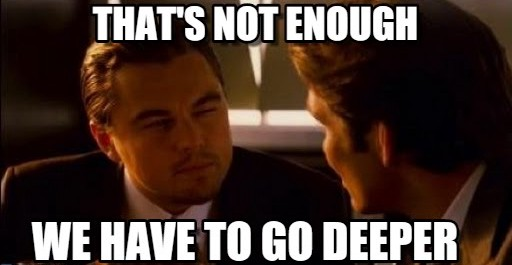
<p style="text-align: center;">
    Abb. 5 - Um komplexere Probleme zu lösen, ist es wichtig, das Netz vertikal zu erweitern, d.h. Schichten zu stapeln. [Bildreferenz: Film Inception (2010)]
</p>

Das gestapelte LSTM ist ein Modell mit mehreren versteckten LSTM-Schichten, wobei jede Schicht mehrere Speicherzellen enthält. Da LSTMs mit Sequenzdaten arbeiten, bedeutet dies, dass das Hinzufügen von Schichten zusätzliche Abstraktionsebenen der Input Beobachtungen über die Zeit hinzufügt. [3] RNNs haben von Natur aus eine große zeitliche Tiefe, da ihr versteckter Zustand (engl. hidden state) eine Funktion aller vorherigen versteckten Zustände ist. Sie können auch von der räumlichen Tiefe profitieren, d. h. von der Stapelung mehrerer rekurrenter versteckter Schichten übereinander. [9] Abbildung 6 zeigt ein gestapeltes LSTM-Netz mit zwei Hidden Layers.

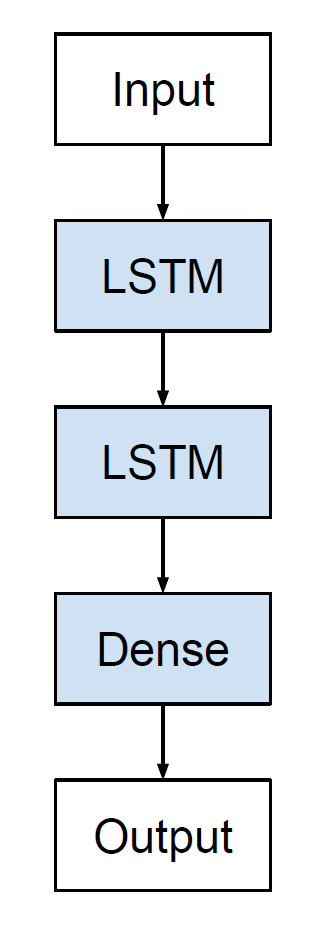
<p style="text-align: center;">
    Abb. 6 - Netzwerkstruktur für ein gestapeltes LSTM-Modell. Die Anzahl der LSTM-Schichten hängt von der Anwendung ab. [3]
</p>

Das gestapelte LSTM-Modell erwartet eine Liste von sechs Modell-Hyperparametern, welche sind:

- n_input: Die Anzahl der Verzögerungsbeobachtungen, die als Input für das Modell verwendet werden sollen.
- n_output: Die Anzahl der Ausgaben des Netzwerks.
- n_layers: Die Anzahl der versteckten LSTM-Schichten.
- n_nodes: Die Anzahl der LSTM-Einheiten in jeder versteckten Schicht. Dieser Parameter muss ein Array mit dem entsprechenden Wert pro Schicht sein.
- n_epochs: Die Anzahl, wie oft das Modell dem gesamten Trainingsdatensatz ausgesetzt werden soll.
- n_batch: Die Anzahl der Datenpunkte innerhalb einer Epoche, nach der die Gewichte aktualisiert werden.
- n_freq: Die Frequenz der Reihe, die für die saisonale Zerlegung verwendet wird.

Jede LSTM-Speicherzelle benötigt eine 3D-Eingabe. Wenn ein LSTM eine Eingangssequenz von Zeitschritten verarbeitet, wird jede Speicherzelle
einen einzigen Wert für die gesamte Sequenz als 2D-Array aus. Um LSTM-Schichten zu stapeln, müssen wir die Konfiguration der vorherigen LSTM-Schicht ändern, um ein 3D-Array als Eingabe für die nachfolgende Schicht auszugeben. Dies ist möglich, indem man das Argument *return_sequences*
auf der Ebene auf True setzt (Standard ist False). Dadurch wird eine Ausgabe für jeden Eingabezeitschritt zurückgegeben und ein 3D-Array bereitgestellt. Abbildung 7 zeigt, wie der Code für zwei versteckte LSTM-Schichten aussehen sollte.

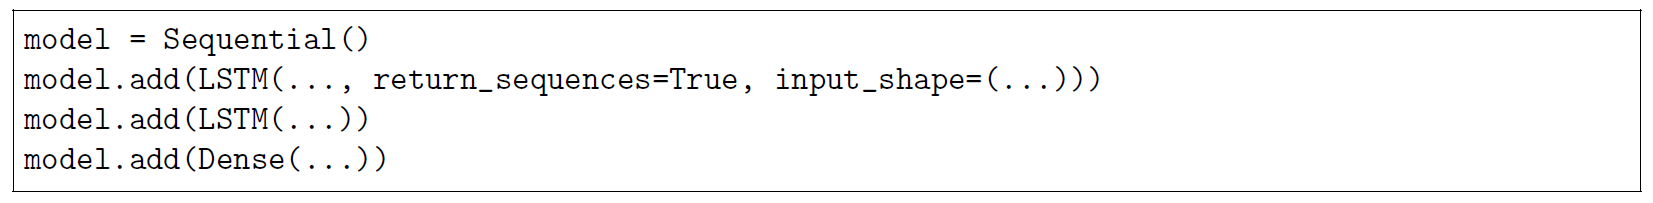
<p style="text-align: center;">
    Abb. 7 - Code zur Definition eines gestapelten LSTM mit 2 Hidden Layers. [3]
</p>

<div class="alert alert-block alert-success">
<b>Aufgabe 6.3.15:</b> Ändern Sie die Funktionen (<code>model_fit()</code>, <code>model_predict()</code>), die Sie zuvor geschrieben haben (für den Vanilla LSTM), um mehrere LSTM-Schichten im Modell zu haben. Füllen Sie die folgende Zelle mit Ihrem neuen Code.



<ul>
<li> Hinweis 1: Seien Sie vorsichtig mit der Definition von n_nodes; in diesem Fall ist es ein Array mit der Anzahl der LSTM-Einheiten in jeder versteckten Schicht und nicht mehr ein einzelner Integer-Wert wie zuvor.
<li>Hinweis 2: <code>model_predict()</code> muss nur die Konfiguration richtig entpacken.


</li>
</ul>
</div>

In [ ]:
# STUDENT CODE HERE

# STUDENT CODE until HERE

<div class="alert alert-block alert-success">
<b>Frage 6.3.16:</b> Nehmen wir an, Sie wollen mit demselben Netz mehrere Zeitschritte vorhersagen. Welche Variable oder Parameter des von Ihnen programmierten gestapelten LSTM-Netzes müssen Sie anpassen, um mehrere Ausgänge statt nur einem zu haben?  
</div>

<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>


#### Diagnose von Under- und Overfitting
Eine der wichtigsten Prüfungen, die Sie an Ihrem Modell durchführen müssen, ist die Überprüfung auf Under- und Overfitting. Dazu benötigen Sie die Trainings- und Validierungsverlustfunktionen, die von der Keras-Methode `.fit()` Ihres Modells erzeugt werden. Diese Werte werden in dem *History*-Objekt gespeichert, das von dieser Funktion zurückgegeben wird. <br>
Normalerweise enthält das History-Objekt die Trainings-/Validierungsgenauigkeit und die Verlustfunktionen, aber dies kann sich von Lösung zu Lösung ändern. Um zu überprüfen, was das History-Objekt enthält, verwenden Sie
````python
# list all data in history
print(history.history.keys())
>> ['acc', 'loss', 'val_acc', 'val_loss']
```

<div class="alert alert-block alert-success">
<b>Aufgabe 6.3.17:</b> Ändern Sie die Funktion <code>model_fit()</code>, um die Verlustfunktion für den Trainings- und den Validierungsprozess zu sammeln und darzustellen.
<ul>

<li>Die Ausgabe der Historie erhalten Sie, indem Sie einfach <code>model_metric = model.fit(...)</code> verwenden.
    

<li>
    Da in der Funktion <code>walk_forward_validation()</code> bereits eine Variable namens <i>history</i> verwendet wird, um vergangene Daten zu speichern, soll hier der Name <b>model_metric</b> für das History-Ausgabeobjekt der Keras-Methode <code>.fit()</code> verwendet werden. Übergeben Sie einfach <b>model_metric</b> durch <code>walk_forward_validation()</code>.

<li>Um den Trainingsdatensatz innerhalb der <code>model_fit()</code>-Funktion in einen Validierungssatz aufzuteilen, verwenden Sie den Parameter <i>validation_split</i> aus der Keras-Methode <code>.fit()</code>. Ein Splitting-Verhältnis von einem Drittel der Gesamtmenge sollte ausreichen.

</ul>

</div>

In [ ]:
def model_fit(train, config):
    # Input:
        # train: time series data in ndarray format. Shape: (time series length x 1)
        # config: list of model hyperparameters
    # Output:
        # model: trained LSTM model
        # model_metric: History output object of the Keras function fit()


    # STUDENT CODE HERE

    # STUDENT CODE until HERE

def walk_forward_validation(data, n_test, cfg):
    # Input:
        # data: time series in ndarray format
        # n_test: integer, splitting index in the array
        # cfg: list of model hyperparameters
    # Output:
        # error: rmse of predictions from the test set
        # model_metric: History output object of model_fit()

    n_input, n_output, n_layers, n_nodes, n_epochs, n_batch, n_freq = cfg

    # STUDENT CODE HERE

    # STUDENT CODE until HERE

# data = series.values  ## uncomment to test for the whole dataset
data = normalized[:2976] ## Executing first with 31 days * 24 hours * 60 mins/15 mins = 2976

# Data split
# n_test = int(0.7*series.size)  ## Testing with 30% of the dataset
n_test = 384 ## Testing with the last 4 days = 384 elements

# Define config: [n_input, n_output, n_layers, n_nodes, n_epochs, n_batch, n_freq]
config = [48, 1, 3, [50, 30, 50], 10, 10, 96]

score, predictions, y_test, model_metric = walk_forward_validation(data, n_test, config)

# Plot train and validation loss
pyplot.plot(model_metric.history['loss'])
pyplot.plot(model_metric.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

<div class="alert alert-block alert-success">
<b>Frage 6.3.18:</b> Analysieren Sie die Graphen, die Sie bei der Analyse des Under-/Overfittings erhalten haben. Was können Sie über Ihr Modell sagen? Würden Sie etwas ändern, um Ihre Ergebnisse zu verbessern? Wenn ja, nehmen Sie die Änderungen vor und schreiben Sie hier eine kurze Dokumentation über Ihre Beobachtungen.
<ul>

<li> Hinweis: Wenn Sie mehr über die Analyse der Trainings- und Validierungsverlustgraphen wissen möchten, können Sie sich das folgende <a href="https://www.tensorflow.org/tutorials/keras/overfit_and_underfit">Tutorial zu Over- und Underfitting von Tensorflow</a> ansehen.
</ul>
</div>

<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>


#### Einige abschließende Hinweise

Bevor wir die Einführung in LSTMs beenden, sollten noch einige Hinweise zu den Hyperparametern des Netzes beachtet werden:

- Das Problem des explodierenden Gradienten kann dort bleiben: LSTMs haben nicht das Problem der verschwindenden Gradienten wie die konventionellen RNNs. Dennoch kann das Problem des explodierenden Gradienten auch bei LSTM-Modellen auftreten. Daher ist das Beschneiden der Gradienten eine gute Lösung für dieses Problem (weitere Informationen finden Sie in <a href="https://machinelearningmastery.com/exploding-gradients-in-neural-networks">diesem Artikel</a>).
- Initialisieren Sie die Forget-Gates mit einem hohen Bias, um das Erinnern zu Beginn des Trainingsprozesses zu fördern.
- Bedenken Sie, dass die L2-Regularisierung bei der Arbeit mit LSTM-Netzen manchmal nicht hilfreich ist.
- Es ist immer gut, Dropout im rekurrenten Teil des Netzes zu implementieren (nicht in der Zeitachse des Netzes).

## Referenzen
[1] J. Brownlee, Introduction to time series forecasting with python: how to prepare data and develop models to predict the future. 2018.<br>
[2] J. Brownlee, Deep Learning for Time Series Forecasting: predict the Future with MLPs, CNNs and LSTMs in Python. 2018.<br>
[3] J. Brownlee, Long Short-Term Memory Networks With Python: Develop Sequence Prediction Models With Deep Learning. 2017.<br>
[4] G. Shmueli, Practical Time Series Forecasting with R: A Hands-On Guide, 2nd ed. Axelrod Schnall Publishers, 2016.<br>
[5] I. Sutskever, O. Vinyals, and Q. V. Le, “Sequence to Sequence Learning with Neural Networks,” in Neural Information Processing Systems Conference, 2014.<br>
[6] H. Sak, A. Senior, and F. Beaufays, “Long Short-Term Memory Recurrent Neural Network Architectures for Large Scale Acoustic Modeling.”<br>
[7] K. Greff, R. K. Srivastava, J. Koutník, B. R. Steunebrink, and J. Schmidhuber, “LSTM: A Search Space Odyssey,” Trans. Neural Networks Learn. Syst., 2017.<br>
[8] S. Hochreiter and Ju. Schmidhuber, “Long Short-Term Memory,” Neural Comput., vol. 9, no. 8, pp. 1735–1780, 1997.<br>
[9] A. Graves, A. Mohamed and G. Hinton, "Speech Recognition With Deep Recurrent Neural Networks", 2013. <br>
[10] PennState Eberly College of Science, “5.1 Decomposition Models | STAT 510,” 2018. [Online]. Available: https://onlinecourses.science.psu.edu/stat510/node/69/. [Accessed: 14-Nov-2018].<br>
[11] A. Karpathy: The Unreasonable Effectiveness of Recurrent Neural Networks. http://karpathy.github.io/2015/05/21/rnn-effectiveness/. Version: 2015. [Last Checked: 28.09.2018]. <br>
[12] J. Brownlee: How to develop Deep Learning Models for univariate time series forecasting. https://machinelearningmastery.com/how-to-develop-deep-learning-models-for-univariate-time-series-forecasting/. Version: October, 2018. [Last Checked: 19.05.2019].